In [72]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# k_dic = {}

In [73]:
def k_means(k, data1, noIter=1000):
    data = data1.values
    # print(data)
    n = len(data)
    index = np.random.randint(0, n, size= (k,1))
    centroids = []
    
    for x in index:
        centroids.extend(data[x][:])
    
    centroids = np.array(centroids)
    print(centroids)
    
#   Instead of looping through all points and finding the distance from each centroid we can do this    
    distances = cdist(data, centroids ,'euclidean')
    
#   Using the distance to find the closest centroid    
    points_ = [] 
    for distance in distances:
        temp = min(distance)
        res = [i for i, j in enumerate(distance) if j == temp]
        points_.append(res[0])
    
    points = np.array(points_)
#     a shorter way of find the minimum distance from each centroid 
#     points = np.array([np.argmin(i) for i in distances])

    for _ in range(noIter):
        centroids = []
        
        for index in range(k):
            # data[points == index] gives us all the points that are closest to the centroid (labelled as index)
            # .mean() is used to find the mean of the points, axis=0 means along the column, i.e., the points get 
            # added
            # print(data[points == index])
            temp_cent = data[points==index].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.array(centroids)
        distances = cdist(data, centroids ,'euclidean')
        points_=[]
        for distance in distances:
            temp = min(distance)
            res = [i for i, j in enumerate(distance) if j == temp]
            points_.append(res[0])
        points = np.array(points_) 
    return points, centroids

In [74]:
df=pd.read_csv('data-final.csv', delimiter='\t')
display(df)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [75]:
X = df[df.columns[0:50]]
Y = X[0:1000000].fillna(3)
Y = Y.replace(to_replace=0, value=1)
df = X.head(600000)
df = df.fillna(3)
df = df.astype(int)
df = df.replace(to_replace=0, value=1)
df[78790:78799]


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
78790,1,5,1,5,1,3,1,5,1,4,...,5,2,4,2,4,2,3,5,5,4
78791,2,4,3,2,3,4,3,4,4,5,...,3,2,3,3,3,2,3,2,2,3
78792,5,3,2,2,4,1,4,4,3,3,...,4,2,5,2,5,1,5,4,4,5
78793,3,3,2,5,3,3,3,5,2,5,...,3,3,5,2,3,3,1,3,5,4
78794,1,3,3,3,1,4,5,5,1,5,...,1,3,3,2,3,4,1,1,3,2
78795,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
78796,5,1,5,1,5,1,5,2,5,2,...,4,2,5,3,5,2,5,3,5,5
78797,3,1,2,5,1,2,1,5,1,5,...,3,3,3,3,4,3,5,2,3,3
78798,3,1,3,3,4,2,2,3,2,4,...,4,1,4,1,4,2,5,4,5,2


In [76]:


k = 5
points, centroids = k_means(k, df)

[[1 2 3 4 2 1 1 4 2 5 2 5 4 4 4 3 2 1 3 1 1 3 1 5 2 4 2 5 4 2 5 4 4 4 1 1
  4 5 4 3 5 2 4 1 4 1 2 4 5 2]
 [1 4 2 5 5 5 1 4 1 5 4 2 5 5 4 3 4 2 4 5 2 5 1 4 3 5 2 4 4 4 3 5 5 3 1 5
  3 3 4 3 3 2 4 1 4 1 5 3 4 5]
 [3 2 4 2 5 2 4 4 2 2 4 4 4 3 4 2 2 2 2 1 5 5 1 5 1 5 1 5 5 5 4 4 5 1 2 2
  4 1 4 4 5 2 3 2 5 3 5 5 4 5]
 [1 4 1 5 4 2 1 4 2 5 4 5 5 2 2 1 4 4 5 4 2 1 5 4 2 4 5 4 1 3 1 5 4 5 1 5
  1 5 1 1 5 1 5 1 5 1 4 2 5 5]
 [4 1 5 2 5 1 5 1 5 4 2 2 5 2 2 3 2 2 4 2 5 5 5 4 1 2 4 4 5 5 5 1 5 1 5 1
  5 1 5 5 5 3 5 5 5 4 5 4 1 3]]


In [77]:
print(len(points))
points=np.array(points)
df['category']=points



600000


In [78]:
l = [0]*400000
points = np.append(points, l)
points.shape
Y['category'] = points

In [79]:
print(list(df))
df


['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'category']


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,category
0,4,1,5,2,5,1,5,2,4,1,...,1,4,1,4,1,5,3,4,5,2
1,3,5,3,4,3,3,2,5,1,5,...,2,4,2,3,1,4,2,5,3,1
2,2,3,4,4,3,2,1,3,2,5,...,1,2,1,4,2,5,3,4,4,1
3,2,2,2,3,4,2,2,4,1,4,...,2,5,2,3,1,4,4,3,3,0
4,3,3,3,3,5,3,3,5,3,4,...,1,5,1,5,1,5,3,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,1,4,2,5,2,2,2,5,1,5,...,4,1,3,4,5,5,2,4,4,1
599996,1,4,2,4,2,2,1,5,1,5,...,1,5,1,4,1,5,4,5,4,1
599997,1,4,3,4,4,4,3,3,4,4,...,1,5,1,4,1,5,3,3,4,0
599998,3,3,4,2,4,2,3,3,4,3,...,1,4,2,4,2,4,3,4,4,2


In [80]:
X_train, X_test, y_train, y_test = train_test_split(Y[df.columns[0:50]], Y['category'], test_size=0.4, random_state=2)
display(X_test)
display(y_test)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
309190,2.0,5.0,4.0,5.0,1.0,5.0,1.0,4.0,4.0,5.0,...,5.0,2.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,2.0
240953,5.0,2.0,5.0,2.0,5.0,4.0,5.0,2.0,5.0,2.0,...,4.0,2.0,2.0,2.0,5.0,4.0,5.0,5.0,2.0,5.0
609687,2.0,5.0,3.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,...,3.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0,3.0
757042,5.0,1.0,4.0,1.0,4.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,5.0
788110,1.0,5.0,5.0,3.0,3.0,5.0,2.0,5.0,1.0,5.0,...,4.0,2.0,5.0,2.0,5.0,1.0,5.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583790,2.0,1.0,4.0,4.0,3.0,1.0,4.0,4.0,3.0,4.0,...,5.0,1.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0
156125,1.0,5.0,3.0,5.0,3.0,5.0,3.0,5.0,1.0,5.0,...,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,5.0,5.0
124439,3.0,2.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,2.0,...,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0
995561,1.0,1.0,5.0,3.0,1.0,1.0,2.0,5.0,2.0,5.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,4.0,5.0,5.0


309190    0
240953    2
609687    0
757042    0
788110    0
         ..
583790    0
156125    3
124439    0
995561    0
682921    0
Name: category, Length: 400000, dtype: int32

In [81]:
# the nn.Module is the PyTorch class we are inheriting from so that we can use the prebuild functionalities
# inheritance is basically deriving the functions/ variables from your parent class (nn.Module) to a child class(Net)

class NetModel(nn.Module):
    # Init is the constructor for this python class
    # The self is like the keyword this in c++, which basically tells the complier
    # that we are refering to the current instance of the class
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, no_class):
        super(NetModel, self).__init__()# this statement calls the constructor of our parent class which is nn.Module
        self.linear1 = nn.Linear(input_dim, hidden1_dim)
        self.linear2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.linear3 = nn.Linear(hidden2_dim, no_class)
    # we define a function called forward for forward propagation
    # Note: we have to name the function forward
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.softmax(self.linear3(x), dim=1)
        return x

In [82]:
# making an object for our model
model = NetModel(X_test.shape[1], 30, 15, len(set(y_test)))

# len(set(y_set)) gives us the no of labels which is 3 in this case

In [83]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func  = nn.CrossEntropyLoss()

In [84]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
y_train = Variable(torch.from_numpy(np.array(y_train))).long()
X_test  = Variable(torch.from_numpy(np.array(X_test))).float()
y_test  = Variable(torch.from_numpy(np.array(y_test))).long()

# For complex models we will need to use Datasets and Dataloaders instead of Variable

In [ ]:
epochs = 400
Loss = []

for i in range(epochs):

    # Dataloaders are used to split this whole data into batches, add padding, etc
    y_pred = model(X_train)  
    
    # Calculating the loss
    loss = loss_func(y_pred, y_train)
    Loss.append(loss.item())
    
    # This calculates the gradient and updates the weights for our model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print('At the end of ', i,' th iteration , values of arguments are : \n', model.parameters )

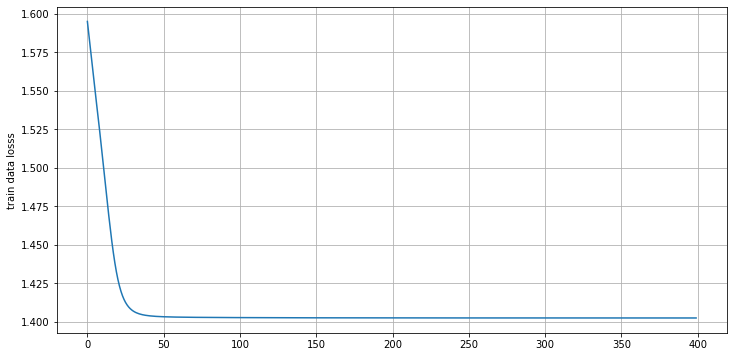

In [86]:
# Plotting the loss

plot, (ax1) = plt.subplots(1, figsize=(12, 6))

ax1.plot(Loss)
ax1.set_ylabel("train data losss")

ax1.grid()

In [91]:
# we write no_grad as we are not going to calculate the gradient for the testing data
with torch.no_grad():
    y_pred = model(X_test)
    correct = (torch.argmax(y_pred, dim=1) == y_test).float()
    print(correct) # gives 0 when y_pred and y_test are not the same (as int/ float value of a bool false is 0)
    
    accuracy = correct.mean()
print(torch.argmax(y_pred, dim=1))

tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0, 0, 0,  ..., 0, 0, 0])
